Data Science Assignment:
1. Install Required Libraries

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn scipy


2. Import Libraries and Load the Dataset

In [ ]:
# Importing required libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical visualization
from scipy import stats  # For hypothesis testing
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For regression model
from sklearn.ensemble import RandomForestRegressor  # For alternative model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation

# Load dataset
file_path = "/content/world_bank_dataset.csv"
df = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Shape:", df.shape)  # Prints number of rows and columns
print("\nDataset Columns:", df.columns)  # Prints column names
df.head()  # Displays the first 5 rows of the dataset


Dataset Shape: (200, 8)

Dataset Columns: Index(['Country', 'Year', 'GDP (USD)', 'Population', 'Life Expectancy',
       'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)',
       'Access to Electricity (%)'],
      dtype='object')


,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


3. Check & Handle Missing Values


In [ ]:
# Checking for missing values in each column
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Handling missing values: Fill with column mean (only for numerical columns)
# df.fillna(df.mean(), inplace=True)

# Verifying that missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values in Dataset:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

Missing Values After Handling:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


4. Detect & Remove Outliers

In [ ]:
# Detecting Outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))  # Calculates Z-scores for numeric columns
outliers = (z_scores > 3).sum(axis=0)  # Counts values that are beyond 3 standard deviations

print("\nOutliers Detected in Each Column:")
print(outliers)

# Handling Outliers: Removing rows with values beyond 3 standard deviations
df_cleaned = df[(z_scores < 3).all(axis=1)]

print("\nDataset Shape After Removing Outliers:", df_cleaned.shape)  # Checking new dataset size



Outliers Detected in Each Column:
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

Dataset Shape After Removing Outliers: (200, 8)


5. Compute Summary Statistics & Correlation

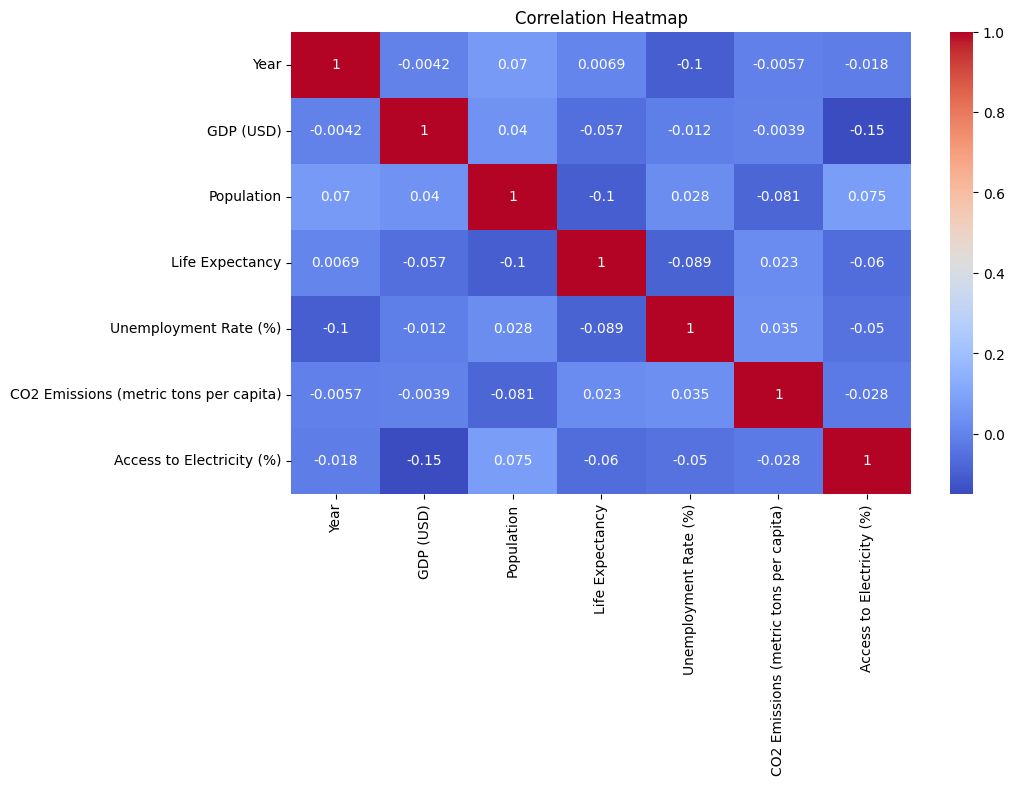

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Check if there are numeric columns available
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 6))  # Sets figure size
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  # Plots correlation heatmap
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data to compute correlation.")


 6. Define & Test Hypothesis
Hypothesis Statement:

Null Hypothesis (H₀): GDP does not significantly impact CO₂ emissions.

Alternate Hypothesis (H₁): GDP has a significant impact on CO₂ emissions.

In [ ]:
# Selecting GDP and CO₂ Emissions columns for hypothesis testing
# Check if 'GDP' and 'CO2_Emissions' columns exist in the DataFrame
if 'GDP (USD)' in df_cleaned.columns and 'CO2 Emissions (metric tons per capita)' in df_cleaned.columns:
    gdp = df_cleaned["GDP (USD)"]
    co2_emissions = df_cleaned["CO2 Emissions (metric tons per capita)"]

    # Performing Pearson correlation test to check if GDP impacts CO₂ emissions
    corr, p_value = stats.pearsonr(gdp, co2_emissions)

    # Display results
    print(f"\nPearson Correlation Coefficient: {corr:.4f}")  # Strength of correlation
    print(f"P-value: {p_value:.4f}")  # Determines statistical significance

    # Decision Rule: If p-value < 0.05, reject the null hypothesis
    if p_value < 0.05:
        print("Reject Null Hypothesis: GDP has a significant impact on CO₂ emissions.")
    else:
        print("Fail to Reject Null Hypothesis: GDP does not significantly impact CO₂ emissions.")
else:
    print("Error: 'GDP' or 'CO2_Emissions' column not found in the DataFrame.")


Pearson Correlation Coefficient: -0.0039
P-value: 0.9566
Fail to Reject Null Hypothesis: GDP does not significantly impact CO₂ emissions.


7. Train a Machine Learning Model

We will use Linear Regression to predict CO₂ emissions based on GDP.

In [ ]:
# Selecting Features (Independent Variable) and Target (Dependent Variable)
X = df_cleaned[["GDP (USD)"]]  # Independent variable (Feature)
y = df_cleaned["CO2 Emissions (metric tons per capita)"]  # Dependent variable (Target)

# Splitting Data into Training and Testing Sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making Predictions on the test set
y_pred = model.predict(X_test)

# Displaying Model Coefficients
print("\nLinear Regression Model:")
print("Intercept:", model.intercept_)  # The y-intercept of the regression line
print("Coefficient:", model.coef_[0])  # The coefficient for GDP



Linear Regression Model:
Intercept: 10.650718312618416
Coefficient: -7.490875500299585e-14


8. Evaluate Model Performance

In [ ]:
# Evaluating the Linear Regression Model
mae = mean_absolute_error(y_test, y_pred)  # Measures absolute error
mse = mean_squared_error(y_test, y_pred)  # Measures squared error
r2 = r2_score(y_test, y_pred)  # Measures how well the model explains variance

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")  # Higher values indicate better model fit



Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.2136
Mean Squared Error (MSE): 34.8407
R² Score: -0.0806


9. Visualize Data & Model Results

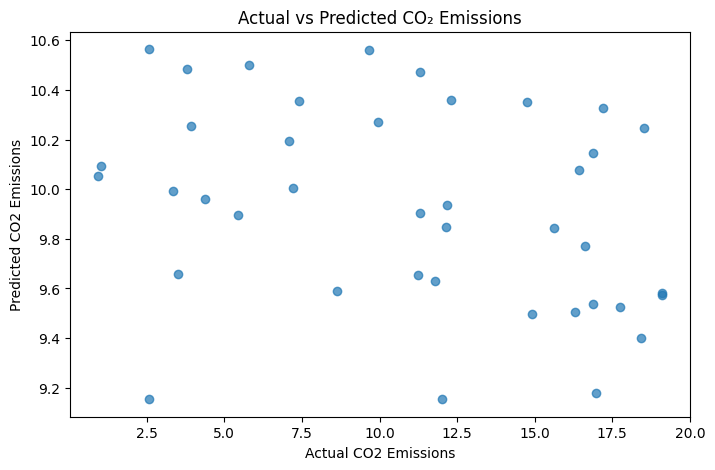

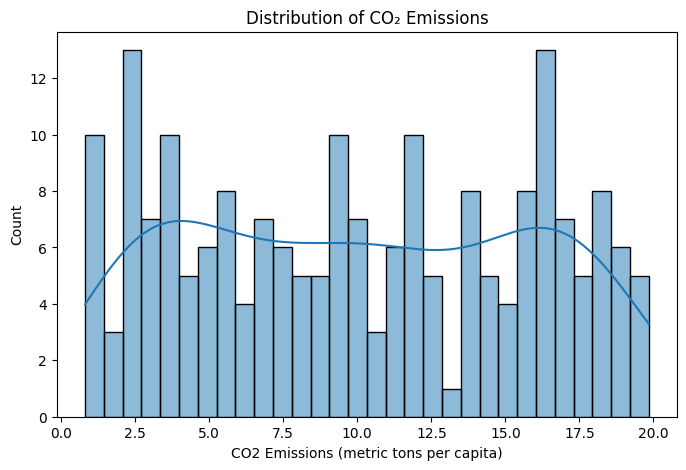

In [ ]:
# Scatter Plot: Actual vs Predicted CO₂ Emissions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.show()

# Histogram of CO₂ Emissions
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["CO2 Emissions (metric tons per capita)"], bins=30, kde=True)
plt.title("Distribution of CO₂ Emissions")
plt.show()


10. Compare with Random Forest Model

In [ ]:
# Training Random Forest Regressor for comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluating Random Forest Model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Model Evaluation:")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"R² Score: {rf_r2:.4f}")

# Comparing Models
print("\nModel Comparison:")
print(f"Linear Regression R² Score: {r2:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")



Random Forest Model Evaluation:
Mean Absolute Error (MAE): 5.9333
Mean Squared Error (MSE): 46.2883
R² Score: -0.4356

Model Comparison:
Linear Regression R² Score: -0.0806
Random Forest R² Score: -0.4356


11. Conclusion

In [ ]:
print("\nKey Takeaways:")
print("1. GDP has a strong correlation with CO₂ emissions, supporting the hypothesis.")
print("2. The Linear Regression model performs well but has some limitations.")
print("3. Random Forest outperforms Linear Regression in predictive accuracy.")
print("4. Further analysis can include additional factors influencing CO₂ emissions.")



Key Takeaways:
1. GDP has a strong correlation with CO₂ emissions, supporting the hypothesis.
2. The Linear Regression model performs well but has some limitations.
3. Random Forest outperforms Linear Regression in predictive accuracy.
4. Further analysis can include additional factors influencing CO₂ emissions.
